# Algoritmo 2: Bordes verticales

En primer lugar se importan todos los paquetes y módulos necesarios

In [1]:
import numpy as np
import cv2 #This is openCV
import matplotlib.pyplot as plt 

Se sube la imagen y se pasa de formato BGR a escala de grises

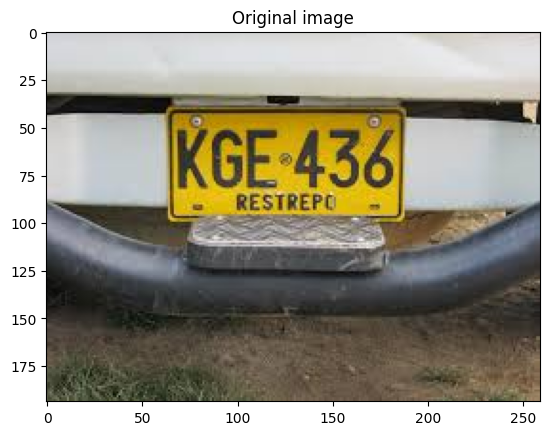

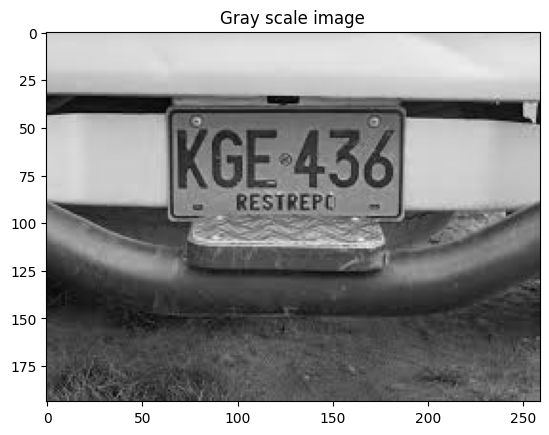

In [3]:
img_original = cv2.imread('Fig/Placa5.jpg', cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img_original, cv2.COLOR_RGB2GRAY)

plt.title("Original image")
plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
plt.show()
plt.title("Gray scale image")
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.show()

Se aplica un filtro blur bilateral que mantiene los bordes presentes en la imagen

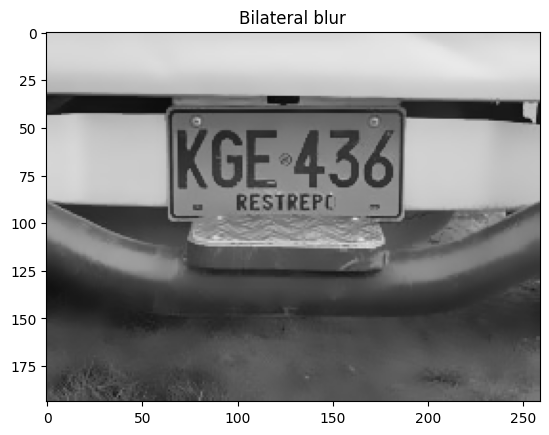

In [4]:
bilateral_blur = cv2.bilateralFilter(img_gray,11,17,17)
plt.title("Bilateral blur")
plt.imshow(cv2.cvtColor(bilateral_blur, cv2.COLOR_BGR2RGB))
plt.show()

Se aplica el algoritmo de Canny para detectar los bordes

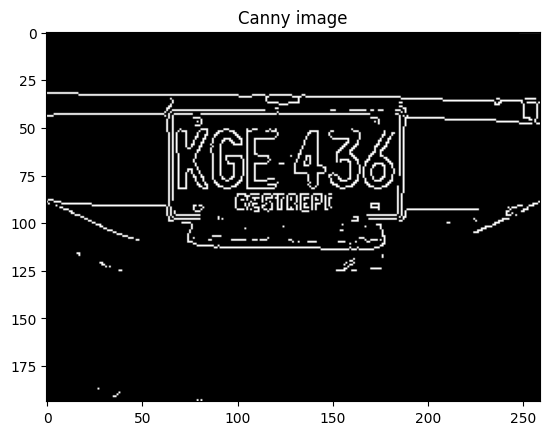

In [5]:
edged = cv2.Canny(bilateral_blur, 240, 250)

plt.title("Canny image")
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.show()

Se erosiona la imagen resultante con un elemento estructurante de 5x1. Esto en busca de bordes verticales.

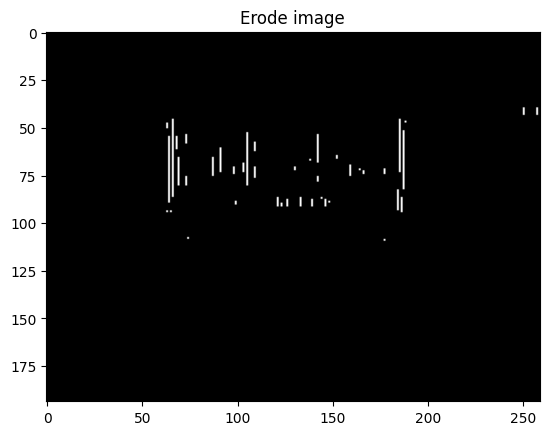

In [6]:
kernel_v_line = np.ones((5, 1), np.uint8)
  
erode_v = cv2.erode(edged, kernel_v_line) 

plt.title("Erode image")
plt.imshow(cv2.cvtColor(erode_v, cv2.COLOR_BGR2RGB))
plt.show()

Se realiza la transformación morfológicad de cierre con un elemento estructurante de 5x5 con el fin de engrosar los bordes verticales que se encontraron.

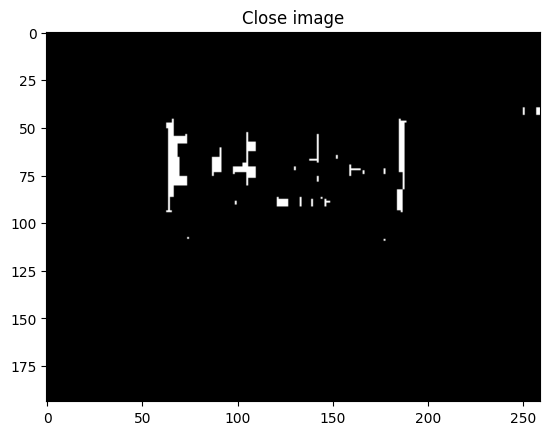

In [8]:
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(erode_v, cv2.MORPH_CLOSE, kernel)
plt.title("Close image")
plt.imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))
plt.show()

Se realiza una segunda erosión con el fin de eliminar los pixeles que no estén cerca a la zona con mayores bordes verticales

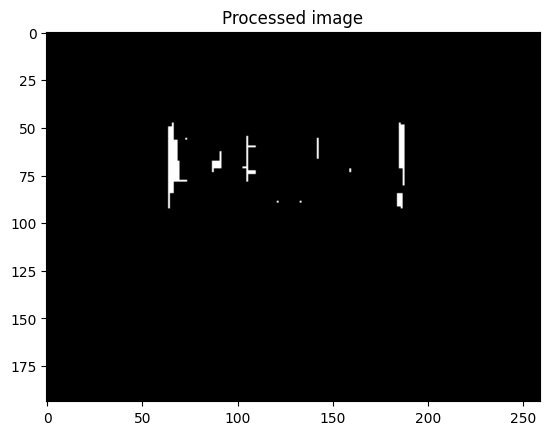

In [9]:
processed_image = cv2.erode(closing, kernel_v_line) 
plt.title("Processed image")
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.show()

Se realiza un escaneo de la imagen resultante y se guarda la cantidad de pixeles blancos que hay en cada fila y columna.

In [10]:
white_in_rows = np.zeros(processed_image.shape[0])
for i, row in enumerate(processed_image):
    for value in row:
        if value == 255: white_in_rows[i]+=1
        
white_in_columns = np.zeros(processed_image.shape[1])
for i in range(processed_image.shape[1]):
    for value in processed_image[:, i]:
        if value == 255: white_in_columns[i]+=1

Se seleccionan únicamente aquellas filas y columnas que tengan un determinado número de pixeles blancos. En este caso, las filas deben tener mínimo 6 pixeles y las columnas mínimo 20 pixeles.

In [11]:
min_white_pixels_columns = 20
min_white_pixels_rows = 6
selected_rows = [i for i, row in enumerate(white_in_rows) if row > min_white_pixels_rows]
selected_columns = [i for i, column in enumerate(white_in_columns) if column > min_white_pixels_columns]

print(f"Selected rows: {selected_rows}")
print(f"Selected columns: {selected_columns}")

Selected rows: [55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]
Selected columns: [64, 65, 66, 67, 68, 105, 185, 186, 187]


Se seleccionan las filas y columnas de los extremos que encierran un área que es posiblemente una placa. Se usa una tolerancia para las filas de 13 pixeles y para las columnas de 3 pixeles con el fin de encerrar un área mayor. Si no hay filas o columnas seleccionadas, no se encontró placa por este método y ninguna imagen es retornada.

Min row: 42. Max row: 91
Min column: 61. Max column: 190


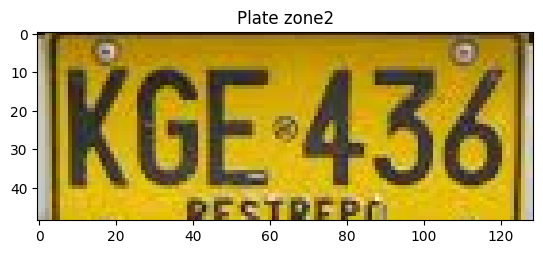

In [12]:
if selected_rows and selected_columns:

    row_security_factor = 13
    column_security_factor = 3

    x1 = min(selected_rows)
    x2 = max(selected_rows)
    y1 = min(selected_columns)
    y2 = max(selected_columns)

    if x1 - row_security_factor > 0: x1 -= row_security_factor
    if y1 - column_security_factor > 0: y1 -= column_security_factor
    if x2 + row_security_factor > 0: x2 += row_security_factor
    if y2 + column_security_factor > 0: y2 += column_security_factor

    print(f"Min row: {x1}. Max row: {x2}")
    print(f"Min column: {y1}. Max column: {y2}")
    plate_zone2 = img_original[x1:x2, y1:y2]

    plt.imshow(cv2.cvtColor(plate_zone2, cv2.COLOR_BGR2RGB))
    plt.title("Plate zone2")
    plt.show()
else: print("Plate not found")

La zona de la imagen, en el caso de que haya sido encontrada, es después pasada por el algoritmo de verificación para comprobar si se trata efectivamente de una placa.